In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Instala la librería pyarrow si no está instalada
!pip install pyarrow

In [2]:
# 1. Elimina copias antiguas y archivos renombrados de subidas anteriores
print("Iniciando limpieza de archivos antiguos...")
!rm -f application_.parquet bureau.parquet bureau_balance.parquet
!rm -f 'application_ (1).parquet' 'bureau (1).parquet' 'bureau_balance (1).parquet'
!rm -f 'application_ (2).parquet' 'bureau (2).parquet' 'bureau_balance (2).parquet' # Cubre hasta la segunda copia

print("Archivos antiguos eliminados.")

!ls

Iniciando limpieza de archivos antiguos...
Archivos antiguos eliminados.
sample_data


In [3]:
from google.colab import files
import pyarrow # Asegúrate de que esta librería esté instalada para leer Parquet

# 3. Ejecuta el diálogo de subida
uploaded = files.upload()



Saving application_.parquet to application_.parquet
Saving bureau.parquet to bureau.parquet
Saving bureau_balance.parquet to bureau_balance.parquet


In [4]:
try:
    df_application = pd.read_parquet('application_.parquet')
    print(" application_parquet cargado con éxito.")

    df_bureau = pd.read_parquet('bureau.parquet')
    print(" bureau.parquet cargado con éxito.")

    df_bureau_balance = pd.read_parquet('bureau_balance.parquet')
    print(" bureau_balance.parquet cargado con éxito.")

    print("\n--- Vista Previa de df_application ---")
    print(df_application.head())

except Exception as e:
    print(f"Error al leer los archivos: {e}")

 application_parquet cargado con éxito.
 bureau.parquet cargado con éxito.
 bureau_balance.parquet cargado con éxito.

--- Vista Previa de df_application ---
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0      

In [5]:
!ls

application_.parquet  bureau_balance.parquet  bureau.parquet  sample_data


In [6]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:

# Seleccionamos columnas numéricas clave para calcular estadísticas
agg_bureau = {
    'DAYS_CREDIT': ['min', 'max', 'mean'], # Antigüedad de los créditos
    'AMT_CREDIT_SUM': ['sum', 'mean', 'max'], # Monto total y promedio de créditos
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean'], # Monto total y promedio de deuda
    'CREDIT_DAY_OVERDUE': ['max'], # Máximo de días de mora
    'SK_ID_BUREAU': ['count'] # Número total de créditos por cliente (clave primaria en bureau)
}

bureau_agg = df_bureau.groupby('SK_ID_CURR').agg(agg_bureau)


bureau_agg.columns = ['BUREAU_' + '_'.join(col).upper() for col in bureau_agg.columns.values]

df_application = df_application.merge(bureau_agg, on='SK_ID_CURR', how='left')



print("Feature Engineering de Buró completado.")
print("Nuevas dimensiones de df_application:", df_application.shape)
print("Vista previa de las nuevas columnas:")
print(df_application[[col for col in df_application.columns if col.startswith('BUREAU_')]].head())

Feature Engineering de Buró completado.
Nuevas dimensiones de df_application: (307511, 132)
Vista previa de las nuevas columnas:
   BUREAU_DAYS_CREDIT_MIN  BUREAU_DAYS_CREDIT_MAX  BUREAU_DAYS_CREDIT_MEAN  \
0                 -1437.0                  -103.0                  -874.00   
1                 -2586.0                  -606.0                 -1400.75   
2                 -1326.0                  -408.0                  -867.00   
3                     NaN                     NaN                      NaN   
4                 -1149.0                 -1149.0                 -1149.00   

   BUREAU_AMT_CREDIT_SUM_SUM  BUREAU_AMT_CREDIT_SUM_MEAN  \
0                 865055.565               108131.945625   
1                1017400.500               254350.125000   
2                 189037.800                94518.900000   
3                        NaN                         NaN   
4                 146250.000               146250.000000   

   BUREAU_AMT_CREDIT_SUM_MAX  BUREAU_AMT_

In [9]:
bb_agg = df_bureau_balance.groupby('SK_ID_BUREAU').agg(
    BB_MESES_MAX=('MONTHS_BALANCE', 'max'),
    BB_MESES_COUNT=('MONTHS_BALANCE', 'count'),
    BB_MORA_COUNT=('STATUS', lambda x: (x > '0').sum()) # Cuenta estados de mora (1, 2, 3, 4, 5)
)

bb_agg = bb_agg.reset_index()

df_bureau_merged = df_bureau.merge(bb_agg, on='SK_ID_BUREAU', how='left')

# Aquí se integran las features de balance mensual con las features estáticas del bureau

agg_bureau_final = {
    # Features estáticas originales de bureau (re-agregadas)
    'DAYS_CREDIT': ['min', 'mean'],
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean'],
    # Nuevas Features de Comportamiento Mensual (BB_MORA_COUNT)
    'BB_MORA_COUNT': ['sum', 'mean', 'max'], # Suma total de meses en mora, promedio, y máximo
    'BB_MESES_COUNT': ['sum', 'mean'],      # Total de meses de historial de balance reportado
    'SK_ID_BUREAU': ['count']               # Número total de préstamos
}

bureau_balance_final_agg = df_bureau_merged.groupby('SK_ID_CURR').agg(agg_bureau_final)
bureau_balance_final_agg.columns = ['BUREAU_BB_' + '_'.join(col).upper() for col in bureau_balance_final_agg.columns.values]

# 5. Unir al DataFrame de aplicación principal (df_application)
df_application_new = df_application.merge(bureau_balance_final_agg, on='SK_ID_CURR', how='left')

print("Integración de bureau_balance.parquet completada.")
print("Nuevas dimensiones de df_application:", df_application_new.shape)

Integración de bureau_balance.parquet completada.
Nuevas dimensiones de df_application: (307511, 142)


In [10]:
# Variables clave originales del df_application (se mantienen igual)
numerical_features = [
    'AMT_INCOME_TOTAL', # Ingreso
    'AMT_CREDIT',       # Monto del préstamo
    'DAYS_BIRTH',       # Edad (negativo)
    'DAYS_EMPLOYED',    # Antigüedad laboral (negativo)
]

bureau_features = [
    col for col in df_application_new.columns
    if col.startswith('BUREAU_') or col.startswith('BUREAU_BB_')
]

features_for_clustering = numerical_features + bureau_features


df_cluster = df_application_new[features_for_clustering].copy()

print(f"Número de variables seleccionadas para clustering: {len(df_cluster.columns)}")
print("El set de features incluye ahora las variables de bureau_balance.")

Número de variables seleccionadas para clustering: 24
El set de features incluye ahora las variables de bureau_balance.


In [11]:
# 1. Imputar NaNs en las features originales usando la mediana (más robusta que la media)
for col in numerical_features:
    df_cluster[col].fillna(df_cluster[col].median(), inplace=True)

# 2. Imputar NaNs en las nuevas features BUREAU_ con 0 (ya que NaN aquí implica falta de historial)
for col in bureau_features:
    df_cluster[col].fillna(0, inplace=True)

# Verificación de NaNs (debería ser 0)
print(f"Total de valores NaN después de la imputación: {df_cluster.isnull().sum().sum()}")

Total de valores NaN después de la imputación: 0


/tmp/ipython-input-3760069904.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cluster[col].fillna(df_cluster[col].median(), inplace=True)
/tmp/ipython-input-3760069904.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [12]:
# El DataFrame df_cluster ya está limpio de NaNs y listo para escalar
# 1. Inicializar el escalador
scaler = StandardScaler()

# 2. Escalar los datos. El resultado es un arreglo NumPy listo para K-Means.
X_scaled = scaler.fit_transform(df_cluster)

print("Datos escalados (X_scaled) con éxito. Listos para K-Means.")

Datos escalados (X_scaled) con éxito. Listos para K-Means.


Dimensiones de X_scaled: (307511, 24)


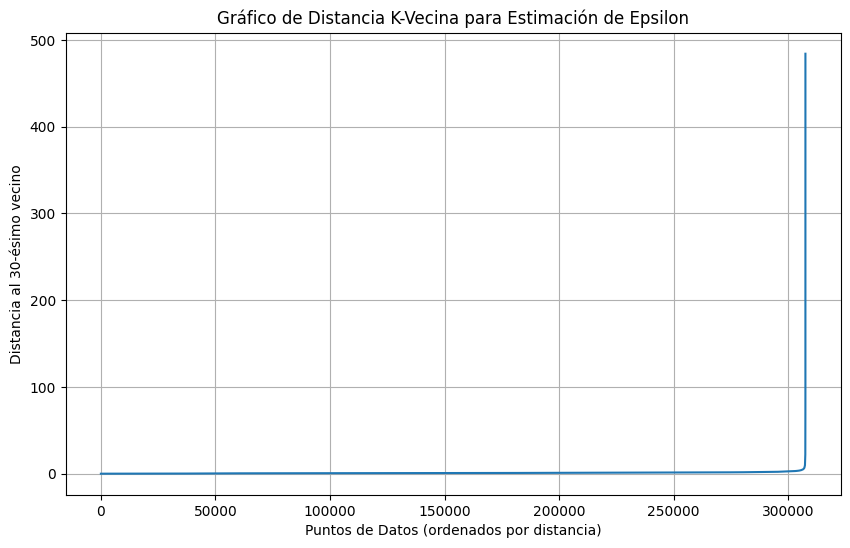


Analiza el gráfico: El valor de Epsilon (Eps) se encuentra donde la curva tiene el 'codo' más fuerte.


In [13]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que X_scaled es tu dataset estandarizado
D = X_scaled.shape[1]
print(f"Dimensiones de X_scaled: {X_scaled.shape}")
MIN_PTS = (D + 6)  # Una regla común es 2 * D (o 2 * D - 1)

# 1. Calcular la distancia al k-ésimo vecino más cercano (donde k = MIN_PTS)
# El resultado es un array de distancias.
neighbors = NearestNeighbors(n_neighbors=MIN_PTS)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# 2. Ordenar las distancias (por lo general, la última columna es la del k-ésimo vecino)
distances = np.sort(distances[:, MIN_PTS-1], axis=0)

# 3. Graficar la distancia ordenada
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Gráfico de Distancia K-Vecina para Estimación de Epsilon')
plt.xlabel('Puntos de Datos (ordenados por distancia)')
plt.ylabel(f'Distancia al {MIN_PTS}-ésimo vecino')
plt.grid(True)
plt.show()

print("\nAnaliza el gráfico: El valor de Epsilon (Eps) se encuentra donde la curva tiene el 'codo' más fuerte.")

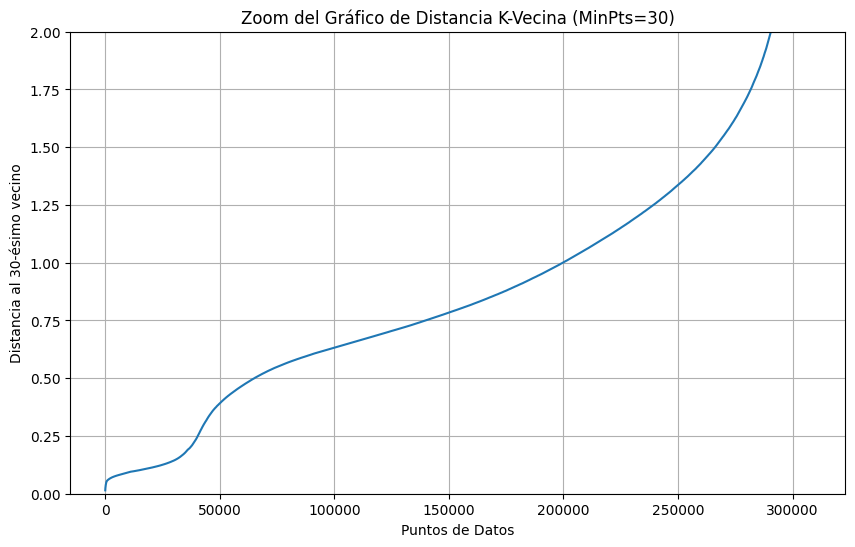

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(distances)

# Limitamos el eje Y para hacer zoom y ver el codo
plt.ylim(0, 2) # Prueba un límite de 5. Si no funciona, intenta 10 o 2.
plt.title(f'Zoom del Gráfico de Distancia K-Vecina (MinPts={MIN_PTS})')
plt.xlabel('Puntos de Datos')
plt.ylabel(f'Distancia al {MIN_PTS}-ésimo vecino')
plt.grid(True)
plt.show()

In [15]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Parámetros finales revisados:
MIN_PTS_FINAL = 30
EPSILON = 1.2 # Valor revisado

# 1. Entrenar el modelo DBSCAN
# Asegúrate de que X_scaled y df_application están disponibles
dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_PTS_FINAL)
dbscan.fit(X_scaled)

# 2. Asignar las etiquetas de cluster al DataFrame original (df_application)
df_application['CLUSTER_LABEL_DBSCAN'] = dbscan.labels_

# 3. Analizar los resultados de DBSCAN
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
num_outliers = list(dbscan.labels_).count(-1)
num_total = len(df_application)

print(f"\n--- Resultados de DBSCAN (Eps={EPSILON}, MinPts={MIN_PTS_FINAL}) ---")
print(f"Número total de clusters encontrados: {num_clusters}")
print(f"Número de puntos etiquetados como OUTLIERS (Etiqueta -1): {num_outliers}")
print(f"Porcentaje de Outliers: {(num_outliers / num_total) * 100:.2f}%")
print("Las etiquetas están en 'CLUSTER_LABEL_DBSCAN'.")

# 4. Análisis de la Tasa de Morosidad (La Clave para el Scoring)
dbscan_analysis = df_application.groupby('CLUSTER_LABEL_DBSCAN').agg({
    'TARGET': ['mean', 'count']
})
dbscan_analysis.columns = ['_'.join(col).strip() for col in dbscan_analysis.columns.values]

print("\n--- Tasa de Morosidad (TARGET mean) por Etiqueta (Cluster o Outlier -1) ---")
print(dbscan_analysis.sort_values(by='TARGET_mean', ascending=False))


--- Resultados de DBSCAN (Eps=1.2, MinPts=30) ---
Número total de clusters encontrados: 5
Número de puntos etiquetados como OUTLIERS (Etiqueta -1): 46842
Porcentaje de Outliers: 15.23%
Las etiquetas están en 'CLUSTER_LABEL_DBSCAN'.

--- Tasa de Morosidad (TARGET mean) por Etiqueta (Cluster o Outlier -1) ---
                      TARGET_mean  TARGET_count
CLUSTER_LABEL_DBSCAN                           
 3                       0.116279            43
 0                       0.090514        212112
-1                       0.064280         46842
 1                       0.053827         48359
 2                       0.047619           126
 4                       0.034483            29


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 1. Crear el modelo PCA y reducir la dimensionalidad a 2 componentes
# Asegúrate de usar los datos escalados (X_scaled)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# 2. Crear un DataFrame con los componentes y la etiqueta de cluster de DBSCAN
pca_dbscan_df = pd.DataFrame(data = components, columns = ['PCA_Componente_1', 'PCA_Componente_2'])

# 3. Añadir la etiqueta de cluster de DBSCAN
# Reemplazar 'df_application' con el nombre de tu DataFrame si es diferente
pca_dbscan_df['CLUSTER_LABEL'] = df_application['CLUSTER_LABEL_DBSCAN']

print("Reducción de dimensionalidad a 2 componentes (PCA) completada.")

Reducción de dimensionalidad a 2 componentes (PCA) completada.


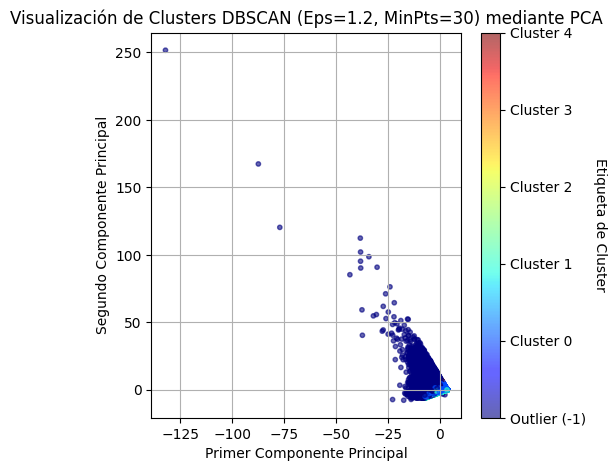


Gráfico de dispersión generado ('dbscan_pca_clusters.png').


In [17]:
# Parámetros usados en DBSCAN para etiquetar el gráfico
EPSILON = 1.2
MIN_PTS_FINAL = 30
NUM_CLUSTERS = pca_dbscan_df['CLUSTER_LABEL'].nunique() - 1 # El -1 es el outlier

plt.figure(figsize=(5, 5))

# Graficar cada cluster. El colormap 'jet' suele manejar bien los clusters + outliers.
scatter = plt.scatter(
    pca_dbscan_df['PCA_Componente_1'],
    pca_dbscan_df['PCA_Componente_2'],
    c=pca_dbscan_df['CLUSTER_LABEL'],
    cmap='jet', # Usa un colormap que varíe bien (ej. 'jet' o 'viridis')
    s=10,
    alpha=0.6
)

plt.title(f'Visualización de Clusters DBSCAN (Eps={EPSILON}, MinPts={MIN_PTS_FINAL}) mediante PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')

# Añadir una barra de colores para interpretar las etiquetas (más fácil que la leyenda)
cbar = plt.colorbar(scatter, ticks=pca_dbscan_df['CLUSTER_LABEL'].unique())
cbar.set_label('Etiqueta de Cluster', rotation=270, labelpad=15)
cbar.ax.set_yticklabels([f'Outlier (-1)' if t == -1 else f'Cluster {int(t)}'
                         for t in pca_dbscan_df['CLUSTER_LABEL'].unique()])


plt.grid(True)
plt.savefig('dbscan_pca_clusters.png')
plt.show()

print("\nGráfico de dispersión generado ('dbscan_pca_clusters.png').")